In [21]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remove the spines from plots
plt.rc("axes.spines", top=False, right=False)

In [2]:
ROOT = os.path.join(os.pardir)
DATA_DIR = os.path.join(ROOT, 'data')
DATA_PATH = os.path.join(DATA_DIR, 'data.csv')

sys.path.append(os.path.join(ROOT, "src"))

%load_ext autoreload
%autoreload 2

In [3]:
from dataloaders.preprocess import get_indices_split

In [4]:
data = pd.read_csv(DATA_PATH)

In [5]:
data.head()

,img_path,class,bbox_x1,bbox_y1,bbox_x2,bbox_y2,test
0,car_ims/000001.jpg,AM General Hummer SUV 2000,112,7,853,717,0
1,car_ims/000002.jpg,AM General Hummer SUV 2000,48,24,441,202,0
2,car_ims/000003.jpg,AM General Hummer SUV 2000,7,4,277,180,0
3,car_ims/000004.jpg,AM General Hummer SUV 2000,33,50,197,150,0
4,car_ims/000005.jpg,AM General Hummer SUV 2000,5,8,83,58,0


# Size of Datasets

In [6]:
print(f'Size of Dataset: {len(data)}')

Size of Dataset: 16185


In [7]:
training_data = data[data['test'] == 0]
test_data = data[data['test'] == 1]

In [8]:
print(f'Size of Train: {len(training_data)}')
print(f'Size of Test: {len(test_data)}')

Size of Train: 8144
Size of Test: 8041


# Distribution of Classes

In [9]:
data['class'].nunique()

196

In [10]:
value_counts = data['class'].value_counts()
value_counts.head()

GMC Savana Van 2012                         136
Chrysler 300 SRT-8 2010                      97
Mercedes-Benz 300-Class Convertible 1993     96
Mitsubishi Lancer Sedan 2012                 95
Jaguar XK XKR 2012                           93
Name: class, dtype: int64

(array([ 2.,  6., 19., 61., 96., 11.,  0.,  0.,  0.,  1.]),
 array([ 48. ,  56.8,  65.6,  74.4,  83.2,  92. , 100.8, 109.6, 118.4,
        127.2, 136. ]),
 <a list of 10 Patch objects>)

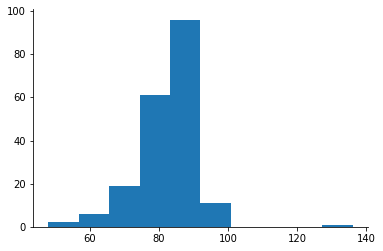

In [24]:
plt.hist(value_counts.values)

Text(0.5, 1.0, 'Distribution of Classes')

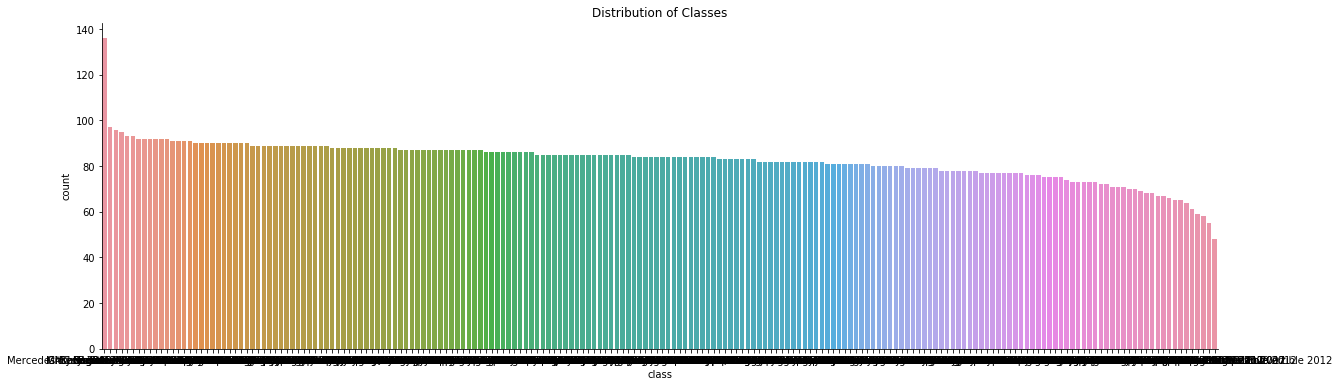

In [11]:
plt.figure(figsize=(20, 6))

sns.countplot(x='class', data=data, order=value_counts.index)\
    .set_title('Distribution of Classes')

Text(0.5, 1.0, 'Distribution of Classes (Training)')

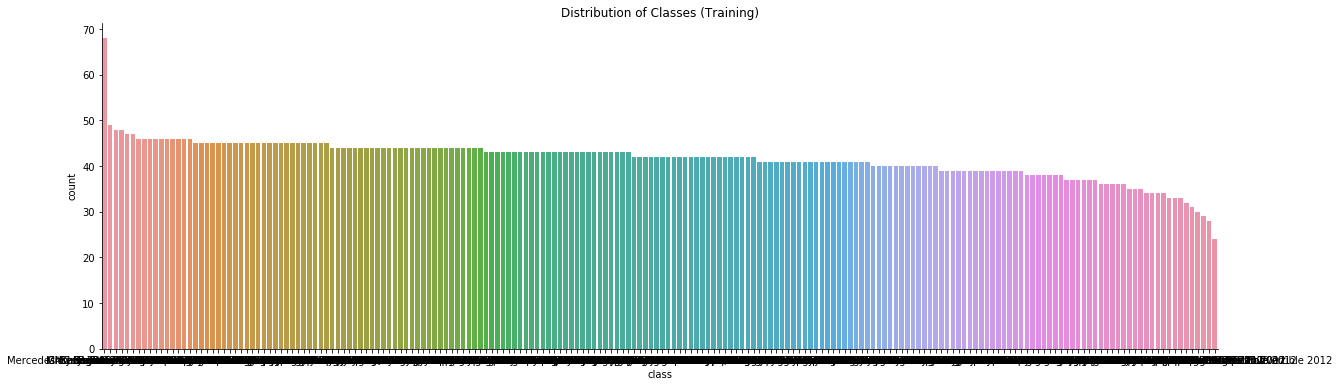

In [12]:
plt.figure(figsize=(20, 6))

sns.countplot(x='class', data=training_data, order=value_counts.index)\
    .set_title('Distribution of Classes (Training)')

Text(0.5, 1.0, 'Distribution of Classes (Test)')

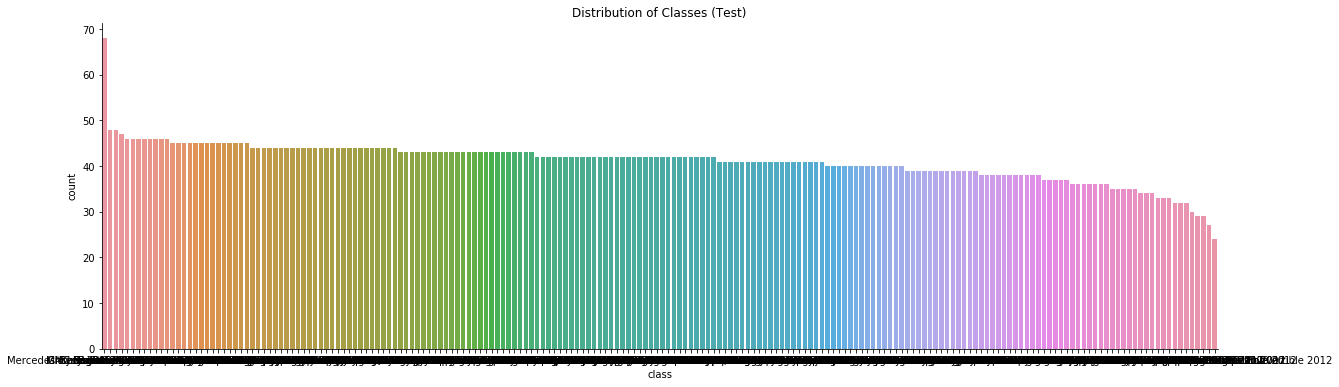

In [13]:
plt.figure(figsize=(20, 6))

sns.countplot(x='class', data=test_data, order=value_counts.index)\
    .set_title('Distribution of Classes (Test)')

It seems like the Train/Test splits both have similar class distributions.

# Determine Train/Val Split

In [14]:
train_indices, val_indices = get_indices_split(training_data, 'class', 0.2)

val_data = training_data.iloc[val_indices]
train_data = training_data.iloc[train_indices]

In [15]:
print(f'Train Size: {len(train_data)}')
print(f'Val Size: {len(val_data)}')

Train Size: 6515
Val Size: 1629


Text(0.5, 1.0, 'Distribution of Classes (Train)')

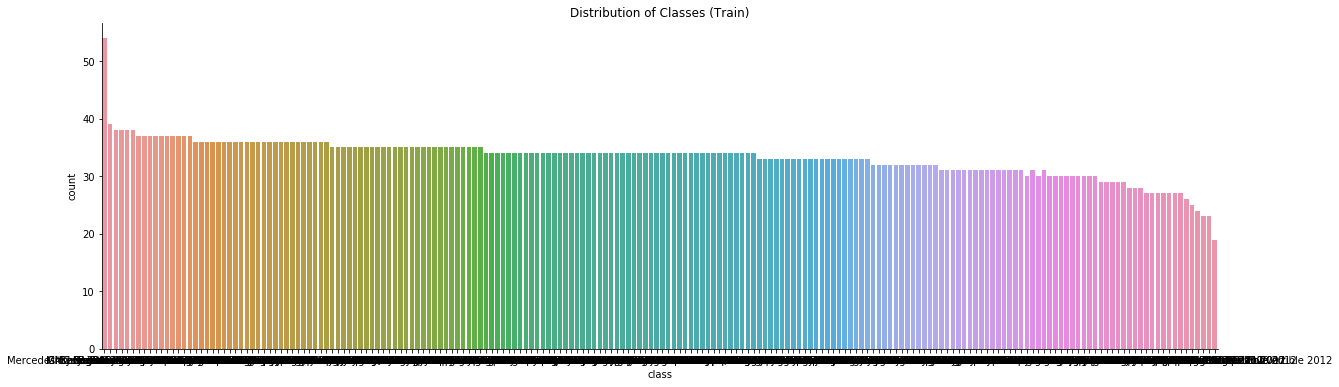

In [16]:
plt.figure(figsize=(20, 6))

sns.countplot(x='class', data=train_data, order=value_counts.index)\
    .set_title('Distribution of Classes (Train)')

Text(0.5, 1.0, 'Distribution of Classes (Val)')

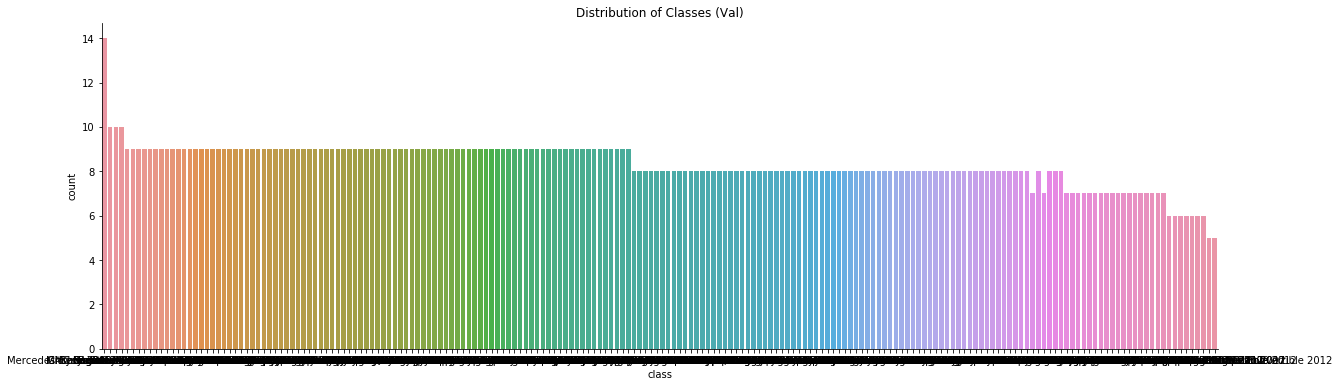

In [17]:
plt.figure(figsize=(20, 6))

sns.countplot(x='class', data=val_data, order=value_counts.index)\
    .set_title('Distribution of Classes (Val)')

In [18]:
val_data['class'].value_counts().tail()

Acura RL Sedan 2012                                    6
Bugatti Veyron 16.4 Convertible 2009                   6
Rolls-Royce Phantom Drophead Coupe Convertible 2012    6
Hyundai Accent Sedan 2012                              5
FIAT 500 Abarth 2012                                   5
Name: class, dtype: int64

In [19]:
train_data['class'].value_counts().tail()

Rolls-Royce Phantom Drophead Coupe Convertible 2012    25
Chevrolet Express Cargo Van 2007                       24
Maybach Landaulet Convertible 2012                     23
FIAT 500 Abarth 2012                                   23
Hyundai Accent Sedan 2012                              19
Name: class, dtype: int64

Validation size of 0.2 seems reasonable enough.

# Visualise Images